# Regresion Lineal

Primero revisaremos la regresión lineal desde una perspectiva de ciencia de datos. Dados algunos datos sobre el sistema que nos interesa, la regresión lineal encontrará una función lineal que describa mejor las relaciones en los datos, por ejemplo, en la siguiente figura. Aquí los datos fueron generados por la función $y =2x+ ϵ$, donde $ϵ$ es algún ruido aleatorio. A pesar del ruido en las observaciones de (x,y), todavía somos capaces de observar que la línea de mejor ajuste tiene una pendiente $m$ cercana a 2, y podríamos concluir que la relación está gobernada por la ecuación $y = mx$. Pero, ¿cómo resolvemos $m$
con solo muestras?

![imagen](https://cpatdowling.github.io/images/notebooks_data/linex2.png)

La regresión funciona minimizando una función de pérdida para encontrar el "mejor ajuste". Una función de pérdida mide el error entre un valor verdadero y conocido $y$ y el valor de nuestra estimación, la salida del modelo lineal $ \hat{y}$. Si la función de pérdida $L$ es el error cuadrático. Entonces la regresión lineal se convierte en el familiar método de mínimos cuadrados. Revisemos los mínimos cuadrados ordinarios utilizando NumPy.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
A = np.array([[0.1, 2],
             [-4, 1.3]])

b = np.array([[0.2],
              [-1.0]])

realizamos el producto punto entre las matrices

In [ ]:
print(np.dot(A, b))
print("\n")
print(A.dot(b))

[[-1.98]
 [-2.1 ]]


[[-1.98]
 [-2.1 ]]


Ahora podemos resolver la ecuación $Ax = b$ entonces $x = A^{-1}b$

In [ ]:
A_inv = np.linalg.inv(A)
x = A_inv.dot(b)
print(x)

[[0.27798278]
 [0.08610086]]


Vamos a aumentar la velocidad con técnicas de NumPy relativamente rápido. Afortunadamente, hay muchos recursos disponibles para aprender rápidamente Python para cálculos o para traducir funciones de un lenguaje que ya conoces, como R o MATLAB. Este cuaderno debería servir como una buena autoevaluación de tu nivel de comodidad con el análisis de datos en Python.

In [ ]:
X = np.random.uniform(-5,5,(1000,2))
X[:5,:]

array([[ 4.15880984, -4.90175875],
       [ 3.99647749,  0.37986943],
       [ 1.17705635, -1.53830819],
       [-2.53431108,  0.21274423],
       [ 0.23866538, -1.51634153]])

In [ ]:
X = np.random.uniform(-5,5,(1000,2))
alpha = np.array([[3.0],
              [-1.0]])
Y = X.dot(alpha) + np.random.normal(0,1,size=(1000,1))

El arreglo $X$ es de 1000 x 2, 1000 filas de muestras, con cada una de las dos columnas siendo una característica de la muestra. Cada fila de $Y$ se ve así:

$$ y_i = \alpha_1 x_{i,1} + \alpha_2 x_{i,2} + \epsilon_i$$

o en notación matricial

$$Y = Xw + \epsilon$$

y el objetivo de la regresión lineal es usar las muestras de datos de entradas $X$ y salidas $Y$ para determinar el valor verdadero de $\alpha = \langle \alpha_1, \alpha_2 \rangle$ con la suposición de que las salidas $Y$ son una función lineal de las características de los datos $X$. Podemos observar los datos que hemos generado:

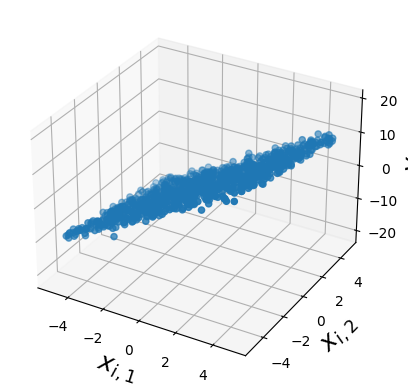

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], Y[:,])
ax.set_xlabel("$x_{i,1}$", fontsize=18)
ax.set_ylabel("$x_{i,2}$", fontsize=18)
ax.set_zlabel('$y_{i}$', fontsize=18)
plt.show()

Esto parece mucho a una línea, así que asumiremos que las salidas fueron generadas por una función lineal; o que el sistema tiene una base lineal. Definiremos la función de pérdida como el error cuadrático y minimizaremos esa pérdida para encontrar la línea de mejor ajuste. En otras palabras, vamos a estimar los coeficientes de la función lineal, $\alpha$ con un vector $\omega$ que nos dé el mejor ajuste de modo que $\hat{Y} = X\omega$. Recordemos que $\hat{Y}$ es la estimación de nuestro modelo de lo que debería ser $Y$. El error,

$$L(Y, \hat{Y}) = \sum_i (y_i - x_i\omega)^2$$

Alternativamente, podemos escribir esto en notación matricial donde $||\cdot||_2$ es la norma 2, o la magnitud de un vector,

$$L(Y, \hat{Y}) = ||Y - X\omega||_2^2$$

Cuando las muestras están vectorizadas, la suma de cuadrados se puede reescribir como,

$$L(Y, \hat{Y}) = (Y - X\omega)^T(Y - X\omega) = Y^TY - Y^TX\omega - (X\omega)^TY + (X\omega)^TX\omega$$
$$ = Y^TY - Y^TX\omega - \omega^TX^TY + \omega^TX^TX\omega$$
$$ = Y^TY - 2\omega^TX^TY + \omega^TX^TX\omega$$

Ahora vamos a tomar la derivada (un vector gradiente) de $L$ con respecto a $\omega$:

$$\nabla_\omega L(Y, \hat{Y}) = -2X^TY + 2X^TX\omega$$

Estableciendo $\nabla_\omega L = 0$, podemos resolver directamente para el $ \omega$ que minimiza esta ecuación, lo cual podemos hacer ya que la norma 2 es convexa y tiene un mínimo único,

$$ 0 = -2X^TY + 2X^TX\omega$$
$$ \omega = (X^TX)^{-1}X^TY$$

Tomando todo el álgebra matricial tal como está, notemos que los pesos $\omega$ que minimizan la función de pérdida en la última línea son simplemente un problema de multiplicación basado en los datos de entrada $X$ y los datos de salida $Y$ de los que tenemos muestras. Calculemos ese problema de multiplicación.

In [ ]:
cov = np.dot(X.T, X)
cov_i = np.linalg.inv(cov)
right = np.dot(X.T, Y)
omega = np.dot(cov_i, right)

omega = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [ ]:
print(omega)
print("\n")
print(alpha)

[[ 2.99939037]
 [-0.99486225]]


[[ 3.]
 [-1.]]


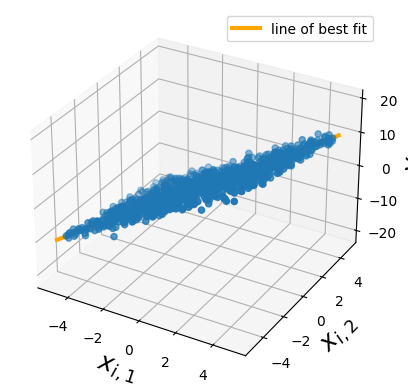

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_1_ran = np.arange(np.min(X[:,0]), np.max(X[:,1]), 0.1)
x_2_ran = np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.1)
X_ran = np.vstack((x_1_ran, x_2_ran)).T
hat_y = X_ran.dot(omega)

ax.plot(x_1_ran, x_2_ran, hat_y[:,0], color="orange", lw=3, label='line of best fit')
ax.scatter(X[:,0], X[:,1], Y[:,])
ax.set_xlabel("$x_{i,1}$", fontsize=18)
ax.set_ylabel("$x_{i,2}$", fontsize=18)
ax.set_zlabel('$y_{i}$', fontsize=18)
ax.legend()

plt.show()

# Practica del gradiente decendiente

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

plt.style.use('ggplot')

In [ ]:
urlDataset = 'https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/houses_prices_prediction.csv.zip'
data = pd.read_csv(urlDataset)
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data.columns

Index(['area', 'bedroom', ' price'], dtype='object')

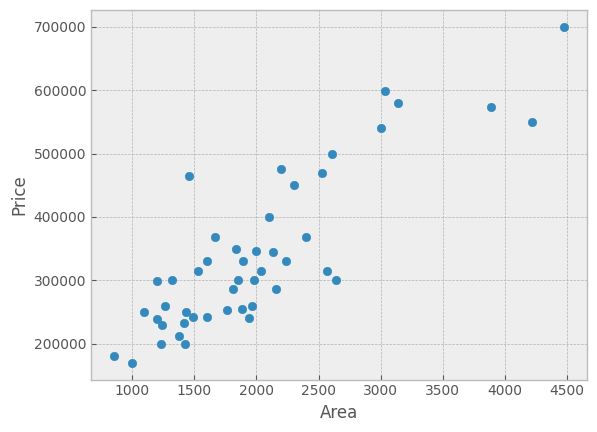

In [ ]:
plt.style.use('bmh')
y = data[' price'].values
X = data['area'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Normalize data
$$ x = \frac{x -\overline x}{\sigma_x} $$

Text(0, 0.5, 'Price')

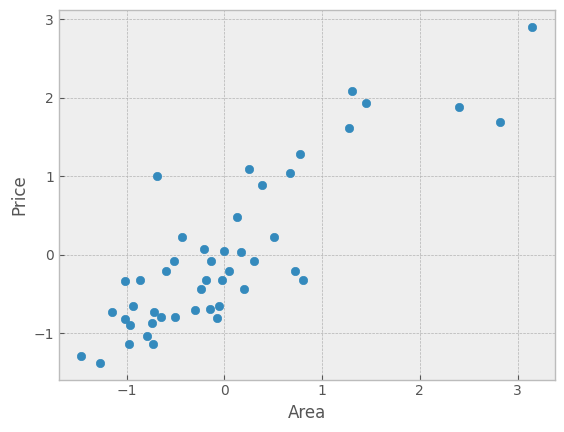

In [ ]:
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std

plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')

## Forma de regresión lineal
$$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$
$ h_\beta(x)$ es la respuesta, $\beta_0$ es la intersección, $\beta_1$ es el coeficiente para $x_1$ (la primera característica)
$\beta_n$ es el coeficiente para $x_n$ (la enésima característica) Los valores $\beta$ son llamados los coeficientes del modelo:

Estos valores son estimados (o "aprendidos") durante el proceso de ajuste del modelo usando el criterio de mínimos cuadrados. Específicamente, estamos buscando la línea (matemáticamente) que minimiza la suma de los residuos al cuadrado (o "suma de los errores al cuadrado"). Y una vez que hemos aprendido estos coeficientes, podemos usar el modelo para predecir la respuesta.

![imagen](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/estimating_coefficients.png)

En el diagrama de arriba:

Los puntos negros son los valores observados de x e y. La línea azul es nuestra línea de mínimos cuadrados. Las líneas rojas son los residuos, que son las distancias verticales entre los valores observados y la línea de mínimos cuadrados.

## Función de Costo
El objetivo se convierte en estimar los parámetros $\beta$ que minimizan la suma de los residuos al cuadrado.

$$J(\beta_0, \beta_1)=\frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

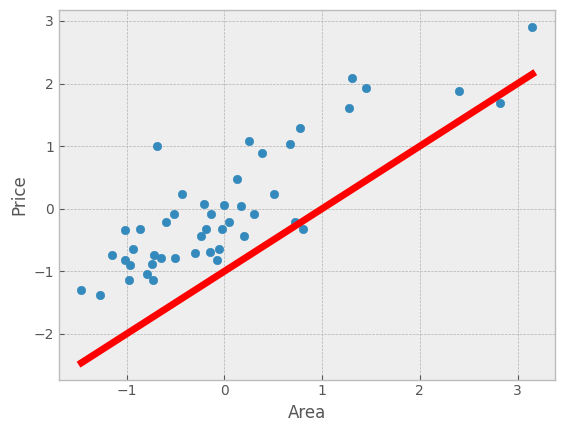

In [ ]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]


# Lets suppose the following betas
beta_ini = np.array([-1, 1])


def lr_h(beta,x):
  return np.dot(beta, x.T)

# scatter plot
plt.scatter(X, y)

# Plot the linear regression
x = np.c_[np.ones(2), [X.min(), X.max()]]
plt.plot(x[:, 1], lr_h(beta_ini, x), 'r', lw=5)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Vamos a calcular el error de la regresion

In [ ]:
# Cost function
def lr_cost_func(beta, x, y):
  # Can be vectorized
  res = 0
  for i in range(x.shape[0]):
    res += (lr_h(beta,x[i, :]) - y[i]) ** 2
  res *= 1 / (2*x.shape[0])
  return res

lr_cost_func(beta_ini, X_, y)

0.6450124071218747

## Entendiendo la función de costo

Vamos a ver como la función de costo se comporta para diferentes valores de $β$

In [ ]:
beta0 = np.arange(-15, 20, 1)
beta1 = 2

Text(0, 0.5, 'J(beta)')

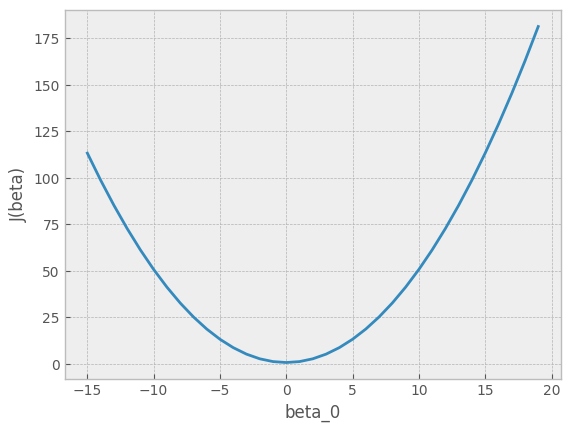

In [ ]:
cost_func=[]
for beta_0 in beta0:
    cost_func.append(lr_cost_func(np.array([beta_0, beta1]), X_, y) )

plt.plot(beta0, cost_func)
plt.xlabel('beta_0')
plt.ylabel('J(beta)')

In [ ]:
beta0 = 0
beta1 = np.arange(-15, 20, 1)

Text(0, 0.5, 'J(beta)')

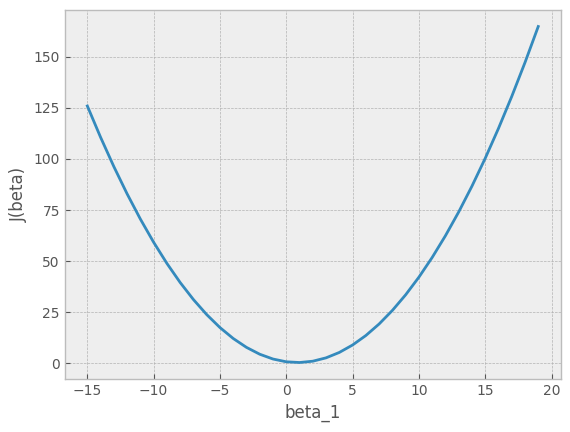

In [ ]:
cost_func=[]
for beta_1 in beta1:
    cost_func.append(lr_cost_func(np.array([beta0, beta_1]), X_, y) )

plt.plot(beta1, cost_func)
plt.xlabel('beta_1')
plt.ylabel('J(beta)')

Analizando para ambos valores de beta

In [ ]:
beta0 = np.arange(-5, 7, 0.2)
beta1 = np.arange(-5, 7, 0.2)

In [ ]:
cost_func = pd.DataFrame(index=beta0, columns=beta1)

for beta_0 in beta0:
  for beta_1 in beta1:
    cost_func.loc[beta_0, beta_1] = lr_cost_func(np.array([beta_0, beta_1]), X_, y)

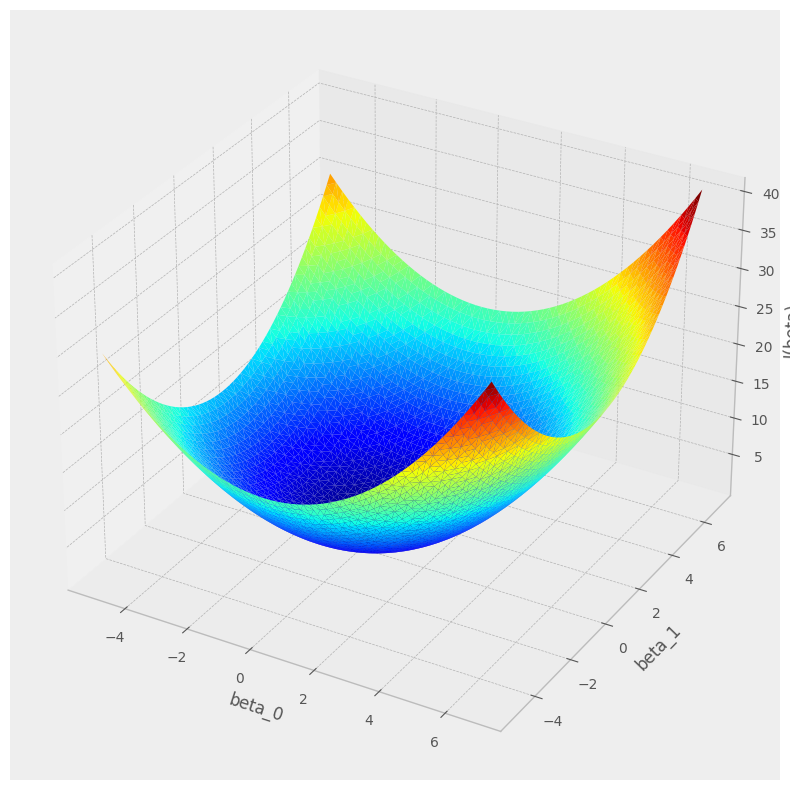

In [ ]:
betas = np.transpose([np.tile(beta0, beta1.shape[0]), np.repeat(beta1, beta0.shape[0])])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(betas[:, 0], betas[:, 1], cost_func.T.values.flatten().astype('float'), cmap=cm.jet, linewidth=0.1)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')
ax.set_zlabel('J(beta)')
plt.show()

## Gradiente decendiente

Teniendo alguna función $J(\beta_0, \beta_1)$. Nosotros queremos minimizar $\min_{\beta_0, \beta_1}J(\beta_0, \beta_1)$

Procedimiento:

* Comenzar con un valor de $\beta_0, \beta_1$

* Mantener el cambio de $\beta_0, \beta_1$ para reducir $J(\beta_0, \beta_1)$

hasta que, con suerte, lleguemos a un mínimo.

## Algoritmo del gradiente decendiente

Repetir la siguiente operación hasta que converga a un valor estatico:

$$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1)$$

Mientras que en simultaneo actualizamos los valores de $j=0$ y $j=1$. $α$ es conocido como la tasa de aprendizaje. Para el caso particular de regresión lineal con una variable y una intersección, el gradiente se calcula de la siguiente manera:

$$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

$$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)^2$$

$ j = 0: \frac{\partial }{\partial \beta_0} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

$ j = 1: \frac{\partial }{\partial \beta_1} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$

Finalmente las ecuaciones que debemos utilizar para nuestro algoritmo seran las siguientes:

$ \beta_0 := \beta_0- \alpha  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

$ \beta_1 := \beta_1- \alpha   \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$

In [ ]:
# gradient calculation
beta_ini = np.array([-1.5, 0.])

def gradient(beta, x, y):
  gradient_0  = 1 / x.shape[0] * ((lr_h(beta, x) - y).sum())
  gradient_1  = 1 / x.shape[0] * ((lr_h(beta, x) - y)* x[:, 1]).sum()

  return np.array([gradient_0, gradient_1])


In [ ]:
def gradient_descent(x, y, beta_ini, alpha, iters):
  betas = np.zeros((iters, beta_ini.shape[0] + 1))
  beta = beta_ini
  for iter_ in range(iters):
      betas[iter_, :-1] = beta
      betas[iter_, -1] = lr_cost_func(beta, x, y)
      beta -= alpha * gradient(beta, x, y)

  return betas

Text(0, 0.5, 'J(beta)')

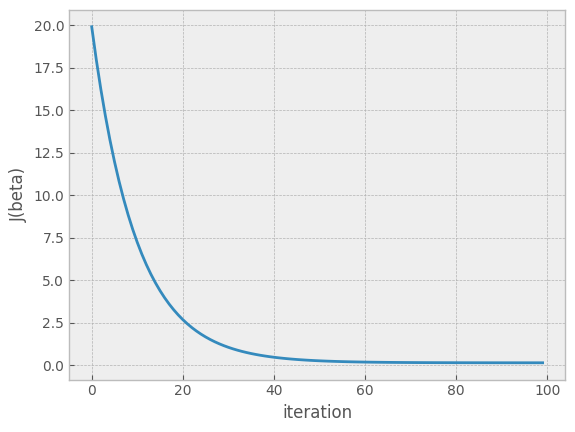

In [ ]:
iters = 100
alpha = 0.05
beta_ini = np.array([-4., -4.])

betas =  gradient_descent(X_, y, beta_ini, alpha, iters)

plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)')

Entendiendo que esta sucediendo es cada iteración

In [ ]:
betas_ = betas[range(0, iters, 10), :-1]
contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 12, 15, 20]

cost_values = cost_func.T.values
if not np.issubdtype(cost_values.dtype, np.floating):
    cost_values = cost_values.astype(float)  # Convertir a float si es necesario
cost_values = np.nan_to_num(cost_values)

for i, beta in enumerate(betas_):
  print('\n\nLinear Regression with betas ', beta)
  f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
  ax2.contour(beta0, beta1, cost_values, contour_levels)
  ax2.set_xlabel('beta_0')
  ax2.set_ylabel('beta_1')
  ax2.scatter(beta[0], beta[1], c='r', s=50)

  if i > 0:
      for beta_ in betas_[:i]:
          ax2.scatter(beta_[0], beta_[1], s=50)

  # scatter plot
  ax1.scatter(X, y)

  # Plot the linear regression
  x = np.c_[np.ones(2), [X.min(), X.max()]]
  ax1.plot(x[:, 1], lr_h(beta, x), 'r', lw=5)
  ax1.set_xlabel('Area')
  ax1.set_ylabel('Price')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Estimando la regresión utilizando sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression(fit_intercept=False)

In [ ]:
linreg.fit(X_, y)

LinearRegression(fit_intercept=False)

In [ ]:
linreg.coef_

array([-9.71656032e-17,  8.54987593e-01])

In [ ]:
datos = pd.read_csv("/content/mtcars.csv")
datos.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
datos.shape

(32, 12)

In [ ]:
from sklearn.model_selection import train_test_split
train_datos, test_datos = train_test_split(datos,test_size=0.2)

In [ ]:
train_datos.shape

(25, 12)

In [ ]:
test_datos.shape

(7, 12)

# Ejercicio de regresión


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
dfcars = pd.read_csv("mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"car name"})
dfcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

In [ ]:
print("Tamaño completo del dataset es: {0}".format(dfcars.shape))
print("Tamaño del dataset de entrenamiento: {0}".format(traindf.shape))
print("Tamaño del dataset de test: {0}".format(testdf.shape))

Tamaño completo del dataset es: (32, 12)
Tamaño del dataset de entrenamiento: (25, 12)
Tamaño del dataset de test: (7, 12)


In [ ]:
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)

regression = LinearRegression()


regression.fit(X_train, y_train)

predicted_y = regression.predict(X_test)

r2 = regression.score(X_test, y_test)
print(r2)

0.6879761857596277


In [ ]:
print(regression.score(X_train, y_train))

print(mean_squared_error(predicted_y, y_test))
print(mean_squared_error(y_train, regression.predict(X_train)))

print('Coefficients: \n', regression.coef_[0], regression.intercept_)

0.7701379909791616
12.475985659918818
7.7736977663875155
Coefficients: 
 -5.336941400557079 36.93731031351841


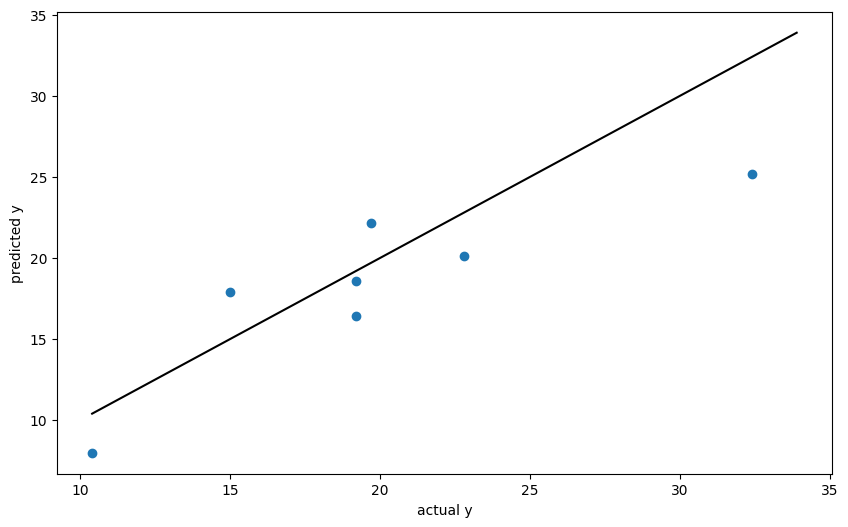

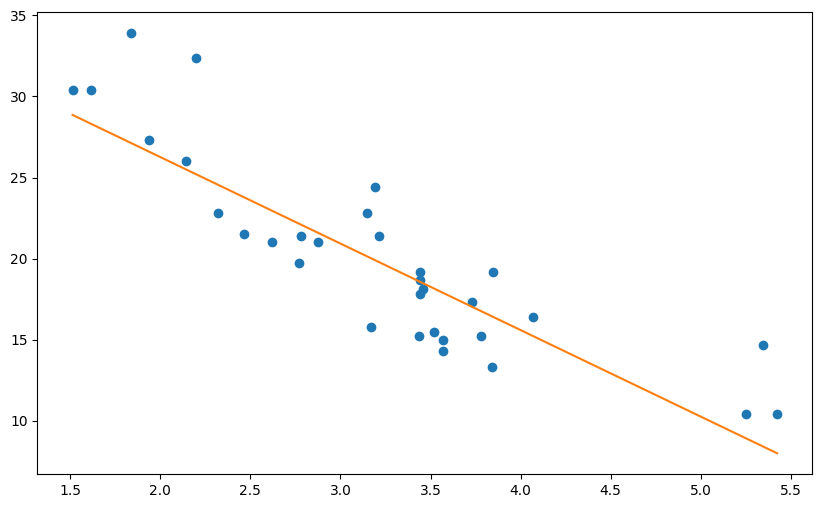

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid = np.linspace(np.min(dfcars.mpg), np.max(dfcars.mpg), 100)
ax.plot(grid, grid, color="black") # 45 degree line
ax.set_xlabel("actual y")
ax.set_ylabel("predicted y")

fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(dfcars.wt, dfcars.mpg, 'o')
xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
ax1.plot(xgrid, regression.predict(xgrid.reshape(100, 1)))